# #Rooms_prices

In [59]:
#import get to call a get request on the site
from requests import get

In [60]:
#get the first page of the east bay housing prices
response = get('https://sfbay.craigslist.org/search/eby/reo?hasPic=1') #get rid of those lame-o's that post a housing option without a pic using their filter

print(response.text[:500])

<!DOCTYPE html>
<html class="no-js">
<head>
    
	<meta charset="UTF-8">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<meta name="viewport" content="width=device-width,initial-scale=1">
	<meta property="og:site_name" content="craigslist">
	<meta name="twitter:card" content="preview">
	<meta property="og:title" content="east bay real estate - by owner - craigslist">
	<meta name="description" content="east bay real estate - by owner - craigslist">
	<meta property="og:description" conten


In [61]:
from bs4 import BeautifulSoup

In [62]:
#grab the HTML as a BS4 soup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [63]:
#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')                      #Li
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 50 (elements/page)

<class 'bs4.element.ResultSet'>
203


In [64]:
#grab the first post
post_one = posts[1]
post_one

<li class="result-row" data-pid="7330922669" data-repost-of="7031040360">
<a class="result-image gallery" data-ids="3:00j0j_g8edTFlXYKfz_0ac071,3:00707_3XE6c0yiEuZz_09Z06R,3:00G0G_lGxZ1u2ALWGz_09Z07o,3:01616_8FsV5L3g0Gmz_09P07a,3:00B0B_7pX0C3p6C5Bz_09W07n,3:00q0q_gjfW8HGMdB1z_09K07a,3:00s0s_4agTdPUYp2Gz_0a907o,3:00u0u_dULURXNdc9rz_08Z07M,3:00h0h_hJrHyoOnKDtz_09M07l,3:00w0w_7JEGeAtDmBCz_09H06M,3:01616_abeP41JOoEez_09G06V,3:00I0I_jTjG03IWgICz_09U073,3:00a0a_k0gUGFN6fcYz_09S07E,3:01515_2f16RSxuiLtz_08W07s,3:00B0B_a5jb0XPe9axz_09i076,3:00S0S_3RnsEklWIaFz_09x07j,3:00505_4G6cYfWz4BAz_09O074,3:00S0S_4CEPQyMwUMjz_09z07j,3:00707_jvcSxKMIyuoz_07p06T,3:00k0k_3QbAhLJiJhKz_09v070,3:00V0V_kDJetsJNzyez_09G07c,3:01717_2qlSW9e1OwUz_09U06L" href="https://sfbay.craigslist.org/eby/reo/d/oakland-upper-rockridge-br-ba-for-sale/7330922669.html">
<span class="result-price">$0</span>
</a>
<div class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</

In [65]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price

'\n$0\n'

In [66]:
#grab the time of the post in datetime format to save on cleaning efforts
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']

#split them and grab each element of the resulting list to get date and time
post_one_datetime = post_one_datetime.split(' ')
post_one_date = post_one_datetime[0]
post_one_date

#element 2 is the time
post_one_time = post_one_datetime[1]

post_one_time

'15:06'

In [67]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = post_one.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']
post_one_link

'https://sfbay.craigslist.org/eby/reo/d/oakland-upper-rockridge-br-ba-for-sale/7330922669.html'

In [68]:
#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text                               #.text
post_one_title_text

'Upper Rockridge 4 Br,  4 Ba for  sale , exchange or rent'

In [69]:
#the neighborhood is grabbed by finding the span class 'result-hood' and pulling the text element from that
#post_one_hood = post_one.find('span', class_= 'result-hood').text
#post_one_hood

In [70]:
# area  floorplan

post_one_area = post_one.find('span', class_='housing').text
post_one_area

'\n                    3000ft2 -\n                '

In [71]:
#build out the loop
from time import sleep
from random import randint
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)

pages = np.arange(0, results_total, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []
post_areas = []

for page in pages:
    
    #get request
    response = get("https://sfbay.craigslist.org/search/eby/reo?hasPic=1?" 
                   + "s=" 
                   + str(page) 
                   + "&hasPic=1"
                   + "&availabilityMode=0")

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)
            
            #post_area = post.find('span', class_='housing').text
            #post_areas.append(post_area)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)

            post_price = post.a.text
            post_prices.append(post_price)
            



    iterations += 1
    print("Finished iteration: " + str(iterations))

Finished iteration: 1


In [72]:
import pandas as pd

eb_rooms = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       #'Area': post_areas,
                       'price': post_prices})
print(eb_rooms.info())
eb_rooms.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posted        152 non-null    object
 1   neighborhood  152 non-null    object
 2   post title    152 non-null    object
 3   URL           152 non-null    object
 4   price         152 non-null    object
dtypes: object(5)
memory usage: 6.1+ KB
None


,posted,neighborhood,post title,URL,price
0,2021-06-24 15:07,(oakland rockridge / claremont),"Upper Rockridge 4 Br, 4 Ba for sale , exchan...",https://sfbay.craigslist.org/eby/reo/d/oakland...,\n$0\n
1,2021-06-24 15:06,(oakland rockridge / claremont),"Upper Rockridge 4 Br, 4 Ba for sale , exchan...",https://sfbay.craigslist.org/eby/reo/d/oakland...,\n$0\n
2,2021-06-24 15:05,(fremont / union city / newark),Great opportunity to own this commuter’s dream...,https://sfbay.craigslist.org/eby/reo/d/newark-...,"\n$1,299,000\n"
3,2021-06-24 15:05,(fremont / union city / newark),Great opportunity to own this commuter’s dream...,https://sfbay.craigslist.org/eby/reo/d/newark-...,"\n$1,299,000\n"
4,2021-06-24 14:22,(alameda),HOME TOUR TODAY 2 Bedroom 1 Bathroom HOUSE,https://sfbay.craigslist.org/eby/reo/d/san-lea...,"\n$2,588\n"
5,2021-06-24 13:42,(West Sacramento),"Take this home off the market for just $1,000!...",https://sfbay.craigslist.org/eby/reo/d/sacrame...,"\n$512,900\n"
6,2021-06-24 12:37,(oakland lake merritt / grand),Hard Money Financing,https://sfbay.craigslist.org/eby/reo/d/oakland...,\n$2\n
7,2021-06-24 11:27,(vallejo / benicia),A family is looking to buy a home off-market.,https://sfbay.craigslist.org/eby/reo/d/port-co...,"\n$450,000\n"
8,2021-06-24 11:10,(berkeley north / hills),Cottage near transportation shopping campus,https://sfbay.craigslist.org/eby/reo/d/berkele...,"\n$1,950\n"
9,2021-06-24 09:34,(oakland west),"West Oakland Development Site near Port, BART...",https://sfbay.craigslist.org/eby/reo/d/oakland...,"\n$2,000,000\n"


# Data cleaning

In [73]:
#convert datetime string into datetime object to be able to work with it
from datetime import datetime

eb_rooms['posted'] = pd.to_datetime(eb_rooms['posted'])
eb_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posted        152 non-null    datetime64[ns]
 1   neighborhood  152 non-null    object        
 2   post title    152 non-null    object        
 3   URL           152 non-null    object        
 4   price         152 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.1+ KB


In [74]:
eb_rooms['price'] = eb_rooms['price'].astype(str)                                 #.astype(str)

In [75]:
import re                                                                            ##re.sub(r'[\n$,]+', '', x))  

eb_rooms['price'] = eb_rooms['price'].apply(lambda x: re.sub(r'[\n$,]+', '', x))  

#replace '' with NaN values in the df before turning the column to int so data shape is maintained

In [76]:
import numpy as np
eb_rooms['price'].replace('', np.nan, inplace=True)

In [77]:
#drop the NAs, I don't like them and we have a lot of data
eb_rooms = eb_rooms.dropna()

In [78]:
#first remove the parentheses                                                                       #
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[()]+', '', x))

#and the /
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[/]+', '', x))

#and commas
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[,]+', '', x)) 

In [79]:
#people spam craigslist so how many of these are unique?
eb_rooms = eb_rooms.drop_duplicates(subset='URL')

In [80]:
eb_rooms

,posted,neighborhood,post title,URL,price
0,2021-06-24 15:07:00,oakland rockridge claremont,"Upper Rockridge 4 Br, 4 Ba for sale , exchan...",https://sfbay.craigslist.org/eby/reo/d/oakland...,0
1,2021-06-24 15:06:00,oakland rockridge claremont,"Upper Rockridge 4 Br, 4 Ba for sale , exchan...",https://sfbay.craigslist.org/eby/reo/d/oakland...,0
2,2021-06-24 15:05:00,fremont union city newark,Great opportunity to own this commuter’s dream...,https://sfbay.craigslist.org/eby/reo/d/newark-...,1299000
3,2021-06-24 15:05:00,fremont union city newark,Great opportunity to own this commuter’s dream...,https://sfbay.craigslist.org/eby/reo/d/newark-...,1299000
4,2021-06-24 14:22:00,alameda,HOME TOUR TODAY 2 Bedroom 1 Bathroom HOUSE,https://sfbay.craigslist.org/eby/reo/d/san-lea...,2588
...,...,...,...,...,...
147,2021-06-24 03:14:00,kewela Hi,OCEANFRONT BEACH LOT,https://sfbay.craigslist.org/sfc/reo/d/kaunaka...,299999
148,2021-06-24 02:19:00,My Private Idaho,Lazy River Lodge,https://sfbay.craigslist.org/sfc/reo/d/colburn...,1695000
149,2021-06-24 00:29:00,napa county,Commercial Building Angwin,https://sfbay.craigslist.org/nby/reo/d/angwin-...,1200000
150,2021-06-24 00:04:00,excelsior outer mission,VACATION HOME SAN SALVADOR,https://sfbay.craigslist.org/sfc/reo/d/san-fra...,180000


In [81]:
#now turn the price to int
eb_rooms['price'] = eb_rooms['price'].astype(int)

In [82]:
eb_rooms.info() #finally a quantitative variable!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posted        152 non-null    datetime64[ns]
 1   neighborhood  152 non-null    object        
 2   post title    152 non-null    object        
 3   URL           152 non-null    object        
 4   price         152 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 6.5+ KB


In [83]:
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: x.lstrip(' '))

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


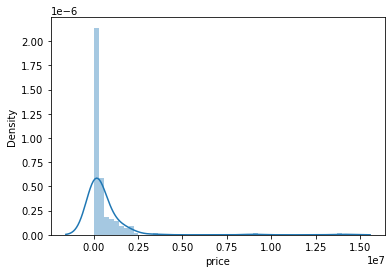

In [84]:
#start to look at the distributions
from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(eb_rooms['price']);

In [86]:
eb_rooms.to_csv('room_prices.csv',  encoding='utf-8', header='true')